In [1]:
import numpy as np
import csv
from tqdm import tqdm
import matplotlib.pyplot as plt
from keras.models import load_model
from InstanceNormalization import InstanceNormalization
from dataset import MRIdataGenerator
from skimage.metrics import structural_similarity as compare_ssim
from skimage.metrics import peak_signal_noise_ratio as compare_psnr



In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [5]:
batch_size = 2

In [7]:
val_generator = MRIdataGenerator("./dataset/testing/", 1, "cartesian_row")

In [8]:
val_generator.__len__()

150

In [9]:
model = load_model("miccia_data_cartesian_row_weights/generator_l2h_45.h5", custom_objects={"InstanceNormalization": InstanceNormalization})

In [10]:
# random = 475
random = 24
# random = np.random.randint(0, val_generator.__len__())

In [11]:
os.path.basename(val_generator.__getitem__(random)[2])

'1036_3x1113_3Warped138.png'

In [19]:
samp = model.predict(val_generator.__getitem__(random)[0], verbose=1)

1/1 [==============================] - 0s 40ms/step


In [16]:
samp.shape, samp.min(), samp.max()

((1, 256, 256, 1), -1.0809633, 0.9505985)

Text(0.5, 1.0, 'Model predicted image')

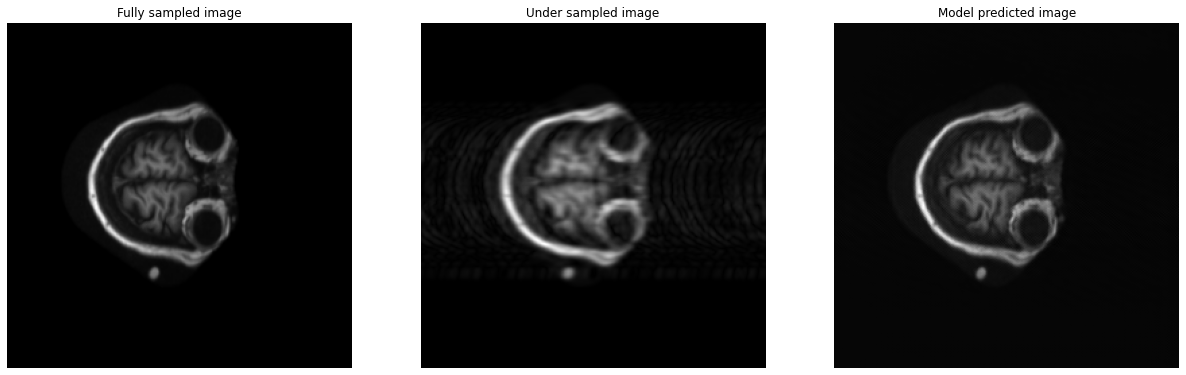

In [17]:
plt.figure(figsize=(21, 21))
plt.subplot(131)
# plt.figure(dpi = 150)
plt.imshow(val_generator.__getitem__(random)[1][0][:,:,0],cmap = "gray")
plt.axis("off")
plt.title("Fully sampled image")
plt.subplot(132)
# plt.figure(dpi = 150)
plt.imshow(val_generator.__getitem__(random)[0][0][:,:,0],cmap = "gray")
plt.axis("off")
plt.title("Under sampled image")
plt.subplot(133)
# plt.figure(dpi = 150)
plt.imshow(samp[0][:,:,0] ,cmap = "gray")
plt.axis("off")
plt.title("Model predicted image")
# plt.savefig("sample.png")

In [159]:
compare_ssim(val_generator.__getitem__(random)[1][0][:,:,0], val_generator.__getitem__(random)[0][0][:,:,0], multichannel=False, data_range=2.0),compare_psnr(val_generator.__getitem__(random)[1][0][:,:,0], val_generator.__getitem__(random)[0][0][:,:,0], data_range=2.0)

C:\Users\Yogeswarr S\AppData\Local\Temp\ipykernel_38056\3408891861.py:1: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  compare_ssim(val_generator.__getitem__(random)[1][0][:,:,0], val_generator.__getitem__(random)[0][0][:,:,0], multichannel=False, data_range=2.0),compare_psnr(val_generator.__getitem__(random)[1][0][:,:,0], val_generator.__getitem__(random)[0][0][:,:,0], data_range=2.0)


(0.8395769720751913, 28.80465985838442)

In [160]:
compare_ssim(val_generator.__getitem__(random)[1][0][:,:,0], samp[0][:,:,0], multichannel=False, data_range=7), compare_psnr(val_generator.__getitem__(random)[1][0][:,:,0], samp[0][:,:,0], data_range=5)

C:\Users\Yogeswarr S\AppData\Local\Temp\ipykernel_38056\377845941.py:1: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  compare_ssim(val_generator.__getitem__(random)[1][0][:,:,0], samp[0][:,:,0], multichannel=False, data_range=7), compare_psnr(val_generator.__getitem__(random)[1][0][:,:,0], samp[0][:,:,0], data_range=5)


(0.991719516712301, 46.19307978206986)

In [163]:
header = ["Image No", "SSIM", "PSNR"]
file = "./results_gaussain/results_gaussain.csv"
with open(file, 'w', newline='') as csvfile:
    csvwritter = csv.writer(csvfile)
    csvwritter.writerow(header)
    for i in tqdm(range(0, val_generator.__len__())):
        samp = model.predict(val_generator.__getitem__(i)[0], verbose=0)
        ssim_val = compare_ssim(val_generator.__getitem__(i)[1][0][:,:,0], samp[0][:,:,0], multichannel=False, data_range=7)
        psnr_val = compare_psnr(val_generator.__getitem__(i)[1][0][:,:,0], samp[0][:,:,0], data_range=5)
#         print("Image N0: ", i, "ssim: ", ssim_val, "psnr: ", psnr_val)
        plt.imsave(f"./results_gaussain/ground_truth/{os.path.basename(val_generator.__getitem__(i)[2])}", val_generator.__getitem__(i)[1][0][:,:,0], cmap="gray")
        plt.imsave(f"./results_gaussain/undersampled/{os.path.basename(val_generator.__getitem__(i)[2])}", val_generator.__getitem__(i)[0][0][:,:,0], cmap="gray")
        plt.imsave(f"./results_gaussain/predicted/{os.path.basename(val_generator.__getitem__(i)[2])}", samp[0][:,:,0], cmap="gray")
        plt.imsave(f"./results_gaussain/error_map/{os.path.basename(val_generator.__getitem__(i)[2])}", cv.absdiff(val_generator.__getitem__(random)[1][1][:,:,0], np.asarray(samp[1][:,:,0], dtype="float64")), cmap="gray")
        csvwritter.writerow([os.path.basename(val_generator.__getitem__(i)[2]), ssim_val, psnr_val])

  0%|          | 0/150 [00:00<?, ?it/s]C:\Users\Yogeswarr S\AppData\Local\Temp\ipykernel_38056\2364409483.py:8: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = compare_ssim(val_generator.__getitem__(i)[1][0][:,:,0], samp[0][:,:,0], multichannel=False, data_range=7)
100%|██████████| 150/150 [01:09<00:00,  2.15it/s]
